<a href="https://colab.research.google.com/github/scholargj/Deeplearning/blob/master/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease Prediction

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving heart.csv to heart (1).csv
User uploaded file "heart.csv" with length 11328 bytes


In [ ]:
file = pd.read_csv('heart.csv')

In [ ]:
file.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print(file.shape)

(303, 14)


In [ ]:
X_train = file

In [ ]:
X_new_train = X_train.drop('target', axis = 1)
Y_train = file['target']
X_new_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
Y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
print(X_new_train.shape, Y_train.shape)

(303, 13) (303,)


In [ ]:
class perceptron:
  
  def __init__(self):
    self.b = None
    self.w = None
  
  def model(self, x):
    return (np.dot(self.w, x) >= self.b)

  def predict(self, X):
    
    Y_pred = list()
    for x in X:
      y_pred = self.model(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)
  
  def fit(self, X, Y,epochs = 3, lr = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    max_accuracy = 0
    
    accuracy = dict()
    
    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred = self.model(x)
        
        if y == 1 and y_pred == 0:
          self.w += lr * x
          self.b += lr * 1
        if y == 0 and y_pred == 1:
          self.w -= lr * x
          self.b -= lr * 1
          
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if(max_accuracy < accuracy[i]):
        max_accuracy = accuracy[i]
        chkp_w = self.w
        chkp_b = self.b
    self.w = chkp_w
    self.b = chkp_b
    
    plt.plot(accuracy.values())
    plt.ylim([0,1])
    plt.show()
    
    print('Maximum Accuracy: ',max_accuracy)
          

In [ ]:
pc = perceptron()

In [ ]:
X_train = X_train.values
Y_train = Y_train.values

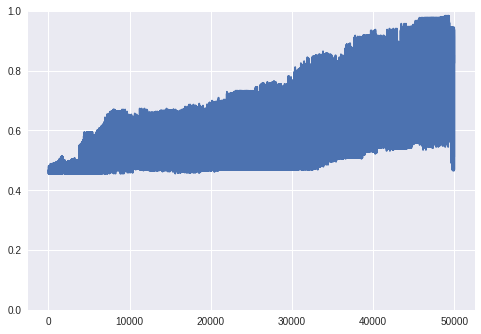

Maximum Accuracy:  0.9834983498349835


In [ ]:
pc.fit(X_train, Y_train,50000, 0.001)

In [ ]:
print('Enter following details to predict whether someone is more likely to have Heart Disease or not: ')
a = int(input('age : '))
s = int(input('sex [Male-1, Female-2]: '))
c  = int(input('cp [0,1,2,3]: '))
tr = int(input('trestbps [80 to 200]: '))
ch = int(input('chol [90 to 580]: '))
f = int(input('fbs [0,1]: '))
r = int(input('restecg [0,1]: '))
t = int(input('thalach [60 to 210]: '))
e = int(input('exang [0,1]: '))
o = int(input('oldpeak [0 to 7]: '))
sl = int(input('slope [0,1,2]: '))	
ca = int(input('ca [0,1,2]: '))
th = int(input('thal [0,1,2,3]: '))
tar = int(input('tar value [0,1]: '))
l = list()
l.extend([a,s,c,tr,ch,f,r,t,e,o,sl,ca,th,l,tar])

Enter following details to predict whether someone is more likely to have Heart Disease or not: 


In [ ]:
l.append(tar)
del l[13]
ln = np.asarray(l[0:14])
print(ln)

[ 30   1   1 100 500   0   1 100   0   6   2   1   3   0]


In [ ]:
for x in X_train:
  print(x)

[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
   1.    1. ]
[ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
   2.    1. ]
[ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
   2.    1. ]
[ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
   2.    1. ]
[ 57.    0.    0.  120.  354.    0.    1.  163.    1.    0.6   2.    0.
   2.    1. ]
[ 57.    1.    0.  140.  192.    0.    1.  148.    0.    0.4   1.    0.
   1.    1. ]
[ 56.    0.    1.  140.  294.    0.    0.  153.    0.    1.3   1.    0.
   2.    1. ]
[ 44.   1.   1. 120. 263.   0.   1. 173.   0.   0.   2.   0.   3.   1.]
[ 52.    1.    2.  172.  199.    1.    1.  162.    0.    0.5   2.    0.
   3.    1. ]
[ 57.    1.    2.  150.  168.    0.    1.  174.    0.    1.6   2.    0.
   2.    1. ]
[ 54.    1.    0.  140.  239.    0.    1.  160.    0.    1.2   2.    0.
   2.    1. ]
[4.80e+01 0.00e+00 2.00e+00 1.30e+02 2.75e+02 0.00e+00 1.00e+00 1.39

In [ ]:
print(ln.shape)

(14,)


In [ ]:
g = pc.model(np.array(ln))
print('Likely to get disease' if g == True else 'Worry not. You are perfect:)' )

Worry not. You are perfect:)
